In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA

In [11]:
wine = pd.read_csv('../../assets/datasets/wine_v.csv')

In [17]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Varietal
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cabernet
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Cabernet
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Cabernet
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Cabernet
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cabernet


## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

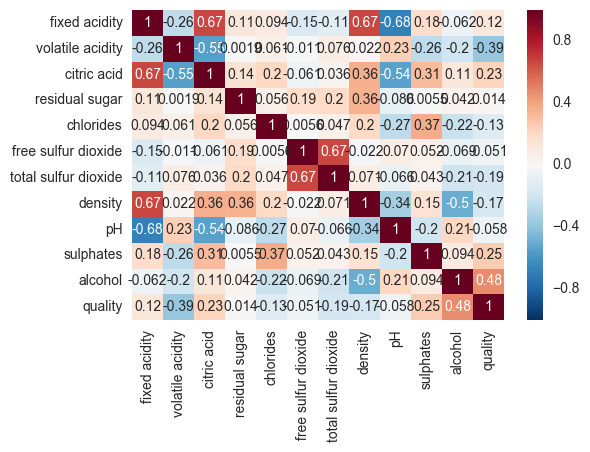

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(wine.corr(),annot=True,fig)

In [ ]:
#sns.pairplot(X)

In [30]:
wine.shape

(1599, 13)

In [33]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [34]:
wine.Varietal.value_counts()

Merlot        800
Cabernet      230
Cabarnet      199
Malbec        191
Pinot Noir    179
Name: Varietal, dtype: int64

## Step 3: Split the data into two sets

Next, split the data into different sets

In [19]:
X=wine.drop('Varietal',axis=1)
y=wine.Varietal

## Step 4: Dimensionality Reduction & PCA

First, let's standardize the data

In [28]:
X_scaled=StandardScaler().fit_transform(X)
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ..., 
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

Now, let's set up our data for decomposition by creating a covariance matrix

In [35]:
cov_mat=np.cov(X_scaled.T)
cov_mat

array([[ 1.00062578, -0.25629118,  0.67212377,  0.11484855,  0.09376383,
        -0.15389043, -0.11325227,  0.66846534, -0.68340559,  0.18312019,
        -0.06170686,  0.12412928],
       [-0.25629118,  1.00062578, -0.55284143,  0.00191908,  0.06133613,
        -0.0105104 ,  0.07651786,  0.02204002,  0.23508431, -0.26115001,
        -0.20241462, -0.39080218],
       [ 0.67212377, -0.55284143,  1.00062578,  0.14366701,  0.20395046,
        -0.06101629,  0.03555526,  0.36517555, -0.54224326,  0.31296577,
         0.10997202,  0.22651417],
       [ 0.11484855,  0.00191908,  0.14366701,  1.00062578,  0.05564433,
         0.18716605,  0.20315493,  0.3555057 , -0.08570602,  0.00553058,
         0.04210177,  0.01374023],
       [ 0.09376383,  0.06133613,  0.20395046,  0.05564433,  1.00062578,
         0.00556563,  0.04743013,  0.20075788, -0.26519198,  0.37149281,
        -0.22127893, -0.12898723],
       [-0.15389043, -0.0105104 , -0.06101629,  0.18716605,  0.00556563,
         1.00062578,  

Now, decompose the the covariance matrix

Check the eigenvalues and eigenvectors

In [36]:
eValue,eVector = np.linalg.eig(cov_mat)

In [37]:
print 'eigen_values\n',eValue
print 'eigen_vector\n',eVector

eigen_values
[ 3.12312087  2.24328497  1.68397283  1.21578121  0.05955516  0.97387267
  0.18033141  0.3281246   0.41156493  0.50618912  0.61870473  0.66300688]
eigen_vector
[[ 0.48788336 -0.00417321 -0.16482854 -0.23109808 -0.63857976 -0.07877938
  -0.25643792  0.18295601 -0.17457815 -0.20052866  0.30721496 -0.0555313 ]
 [-0.26512898  0.33896786 -0.22708884  0.04185824 -0.00466168  0.29937933
   0.37716123 -0.15510563 -0.06022334 -0.14612614  0.62623369 -0.297287  ]
 [ 0.47333547 -0.1373581   0.10022856 -0.0567358   0.07003691 -0.12014871
   0.62432783 -0.34608556 -0.22097505 -0.29633271 -0.24414858 -0.13663328]
 [ 0.13915442  0.16773634  0.24362014 -0.38303758 -0.18364637  0.70936319
   0.08807787  0.05223656  0.27818728  0.17062614 -0.28385429 -0.10931059]
 [ 0.19742679  0.18978819 -0.02660785  0.65477782 -0.05393118  0.26623723
  -0.20861667  0.00386273 -0.41993639  0.18692254 -0.23054697 -0.33733656]
 [-0.04588071  0.25948314  0.61611132 -0.03371148  0.05192167 -0.15941286
   0.237

Let's create the eigenpairs

In [38]:
ePairs=[(np.abs(eValue[i]),eVector[:,i]) for i in range(len(eValue))]
ePairs
ePairs.sort()
ePairs.reverse()
ePairs

[(3.1231208687681766,
  array([ 0.48788336, -0.26512898,  0.47333547,  0.13915442,  0.19742679,
         -0.04588071,  0.00406675,  0.37030119, -0.43272085,  0.25453535,
         -0.07317678,  0.11248878])),
 (2.2432849729241311,
  array([-0.00417321,  0.33896786, -0.1373581 ,  0.16773634,  0.18978819,
          0.25948314,  0.36397137,  0.33078079, -0.06544015, -0.10933362,
         -0.50270865, -0.47316621])),
 (1.6839728325484313,
  array([-0.16482854, -0.22708884,  0.10022856,  0.24362014, -0.02660785,
          0.61611132,  0.54073214, -0.16872267,  0.06977056,  0.21291324,
          0.22497138,  0.22336929])),
 (1.2157812116411921,
  array([-0.23109808,  0.04185824, -0.0567358 , -0.38303758,  0.65477782,
         -0.03371148, -0.02845973, -0.20069341, -0.00546618,  0.56050237,
         -0.09170143, -0.03666923])),
 (0.97387267135316757,
  array([-0.07877938,  0.29937933, -0.12014871,  0.70936319,  0.26623723,
         -0.15941286, -0.21845284,  0.20879298,  0.25764682,  0.2148349

Then, sort and print the eigenpairs from highest to lowest

Calculate the explained variance

In [39]:
tot = sum(eValue)
var_exp = [(i / tot)*100 for i in sorted(eValue, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  26.00973081,   44.69208117,   58.71641193,   68.84158587,
         76.95211604,   82.47371808,   87.62636639,   91.84197103,
         95.26953384,   98.00219545,   99.50401736,  100.        ])

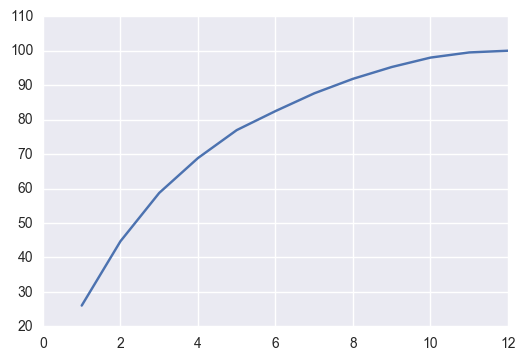

In [42]:
plt.plot(range(1,13),cum_var_exp)

Now, let's construct the projection matrix

Lastly, let's project the matrix using the dot product

## PCA with Scikit-Learn

In [45]:
pcask = sklearnPCA(n_components=2)
y_sk = pcask.fit_transform(X_scaled) #use y_sk to train the model

In [46]:
pcask.explained_variance_

array([ 3.1211677 ,  2.24188204])

In [48]:
pcask = sklearnPCA(n_components=0.95)
X2 = pcask.fit_transform(X_scaled)


In [49]:
pcask.explained_variance_

array([ 3.1211677 ,  2.24188204,  1.68291969,  1.21502087,  0.97326362,
        0.66259224,  0.6183178 ,  0.50587256,  0.41130754])

In [50]:
pcask.explained_variance_ratio_

array([ 0.26009731,  0.1868235 ,  0.14024331,  0.10125174,  0.0811053 ,
        0.05521602,  0.05152648,  0.04215605,  0.03427563])

In [53]:
pcask.components_

array([[ 0.48788336, -0.26512898,  0.47333547,  0.13915442,  0.19742679,
        -0.04588071,  0.00406675,  0.37030119, -0.43272085,  0.25453535,
        -0.07317678,  0.11248878],
       [-0.00417321,  0.33896786, -0.1373581 ,  0.16773634,  0.18978819,
         0.25948314,  0.36397137,  0.33078079, -0.06544015, -0.10933362,
        -0.50270865, -0.47316621],
       [ 0.16482854,  0.22708884, -0.10022856, -0.24362014,  0.02660785,
        -0.61611132, -0.54073214,  0.16872267, -0.06977056, -0.21291324,
        -0.22497138, -0.22336929],
       [ 0.23109808, -0.04185824,  0.0567358 ,  0.38303758, -0.65477782,
         0.03371148,  0.02845973,  0.20069341,  0.00546618, -0.56050237,
         0.09170143,  0.03666923],
       [-0.07877938,  0.29937933, -0.12014871,  0.70936319,  0.26623723,
        -0.15941286, -0.21845284,  0.20879298,  0.25764682,  0.21483493,
         0.25972635,  0.13758414],
       [ 0.0555313 ,  0.297287  ,  0.13663328,  0.10931059,  0.33733656,
        -0.04264807,  

In [54]:
df2=pd.DataFrame(pcask.components_,columns=X.columns)

In [55]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.487883,-0.265129,0.473335,0.139154,0.197427,-0.045881,0.004067,0.370301,-0.432721,0.254535,-0.073177,0.112489
1,-0.004173,0.338968,-0.137358,0.167736,0.189788,0.259483,0.363971,0.330781,-0.065440,-0.109334,-0.502709,-0.473166
2,0.164829,0.227089,-0.100229,-0.243620,0.026608,-0.616111,-0.540732,0.168723,-0.069771,-0.212913,-0.224971,-0.223369
3,0.231098,-0.041858,0.056736,0.383038,-0.654778,0.033711,0.028460,0.200693,0.005466,-0.560502,0.091701,0.036669
4,-0.078779,0.299379,-0.120149,0.709363,0.266237,-0.159413,-0.218453,0.208793,0.257647,0.214835,0.259726,0.137584
5,0.055531,0.297287,0.136633,0.109311,0.337337,-0.042648,0.115954,-0.425667,-0.480354,-0.403743,0.392176,-0.141830
6,-0.307215,-0.626234,0.244149,0.283854,0.230547,-0.138260,-0.110209,-0.122546,0.185692,-0.233402,-0.121719,-0.412388
7,0.200529,0.146126,0.296333,-0.170626,-0.186923,-0.019356,0.089897,0.079500,0.314693,0.275492,0.471189,-0.612247
8,-0.174578,-0.060223,-0.220975,0.278187,-0.419936,-0.318000,0.121823,-0.249074,-0.461916,0.452689,-0.096528,-0.240243
